<a href="https://colab.research.google.com/github/maskot1977/ComputerExercises2022/blob/JPzyAJUh5Ubg2FJc/12%E6%9C%8827%E6%97%A5%E8%AC%9B%E7%BE%A9%E5%88%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第85章：汎用的な多項式関数

In [1]:
def func1(X, a, b): # １次式
    Y = a + b * X
    return Y

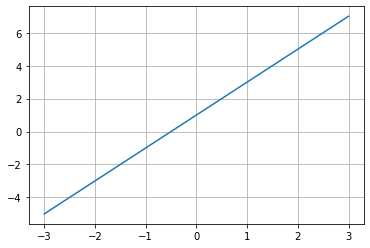

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_latent = np.linspace(-3, 3, 100)
fitted_curve = func1(x_latent, 1, 2)
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

In [3]:
def func2(X, a, b, c): # 2次式
    Y = a + b * X + c * X ** 2
    return Y

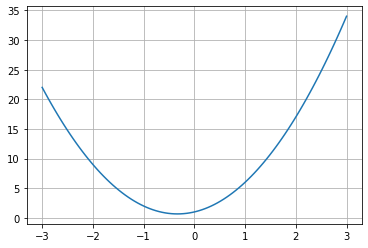

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_latent = np.linspace(-3, 3, 100)
fitted_curve = func2(x_latent, 1, 2, 3)
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

In [5]:
def func(X, *params):
    return params

In [6]:
func(x_latent, 1, 2)

(1, 2)

In [7]:
func(x_latent, 1, 2, 3)

(1, 2, 3)

In [8]:
func(x_latent, 1, 2, 3, 4)

(1, 2, 3, 4)

In [9]:
import numpy as np
def func(X, *params):
    Y = np.zeros_like(X)
    for i, param in enumerate(params):
        #print(i, param)
        Y = Y + np.array(param * X ** i)
    return Y

In [10]:
func(x_latent, 8, -4, 2, -1)

array([ 65.        ,  62.43412082,  59.94771406,  57.53944403,
        55.20797507,  52.95197151,  50.77009767,  48.66101789,
        46.6233965 ,  44.65589782,  42.75718619,  40.92592593,
        39.16078137,  37.46041684,  35.82349667,  34.2486852 ,
        32.73464674,  31.28004564,  29.88354621,  28.54381278,
        27.2595097 ,  26.02930128,  24.85185185,  23.72582575,
        22.6498873 ,  21.62270084,  20.64293068,  19.70924117,
        18.82029663,  17.97476139,  17.17129977,  16.40857612,
        15.68525475,  15.        ,  14.35147619,  13.73834766,
        13.15927874,  12.61293375,  12.09797702,  11.61307288,
        11.15688566,  10.7280797 ,  10.32531931,   9.94726883,
         9.59259259,   9.25995492,   8.94802015,   8.6554526 ,
         8.3809166 ,   8.12307649,   7.8805966 ,   7.65214125,
         7.43637477,   7.23196149,   7.03756574,   6.85185185,
         6.67348415,   6.50112697,   6.33344464,   6.16910148,
         6.00676183,   5.84509002,   5.68275037,   5.51

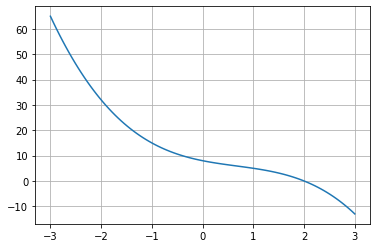

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x_latent = np.linspace(-3, 3, 100)
fitted_curve = func(x_latent, 8, -4, 2, -1)
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

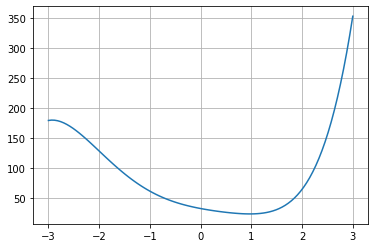

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x_latent = np.linspace(-3, 3, 100)
fitted_curve = func(x_latent, 32, -16, 8, -4, 2, 1)
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

# 第86章：scipy.curve_fitによる多項式近似

In [13]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y = [23, 12, 8, 1, 2, 0, 4, 6, 15, 24, 33]

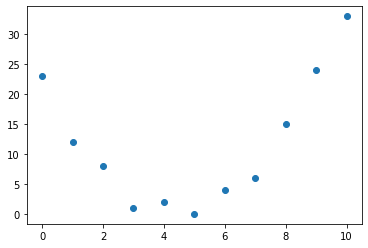

In [14]:
plt.scatter(X, Y)

In [15]:
from scipy.optimize import curve_fit  
popt, pcov = curve_fit(func2, X, Y, p0=np.random.rand(3)) 
popt

array([22.06293706, -9.72983683,  1.09207459])

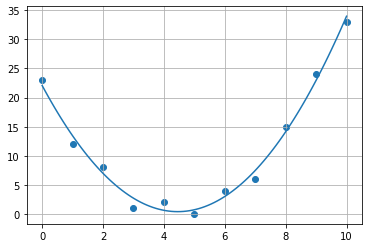

In [16]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, Y)
x_latent = np.linspace(0, 10, 100)
fitted_curve = func2(x_latent, popt[0], popt[1], popt[2])
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

In [17]:
X = [9, 28, 38, 58, 88, 98, 108, 118, 128, 138, 148, 158, 168, 178, 188, 198, 208, 218, 228, 238, 278, 288, 298]
Y = [51, 80, 112, 294, 286, 110, 59, 70, 56, 70, 104, 59, 59, 72, 87, 99, 64, 60, 74, 151, 157, 57, 83]

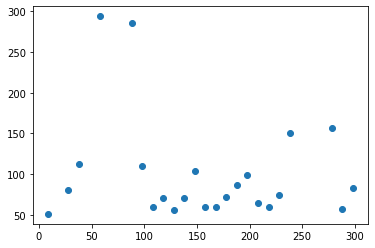

In [18]:
plt.scatter(X, Y)

In [19]:
from scipy.optimize import curve_fit  

d = 3
popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(d + 1)) 
popt

array([ 7.84213995e+01,  1.88213152e+00, -1.74165815e-02,  3.89638167e-05])

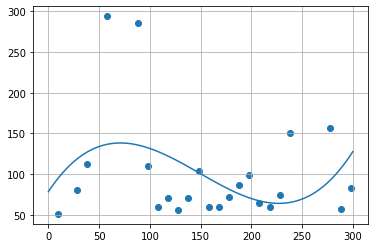

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(X, Y)
x_latent = np.linspace(0, 300, 100)
fitted_curve = func(x_latent, *popt)
plt.plot(x_latent, fitted_curve)
plt.grid()
plt.show()

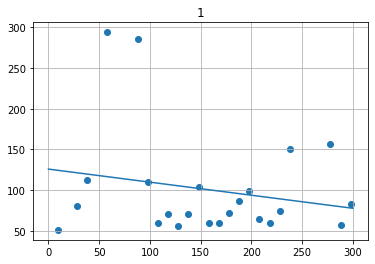

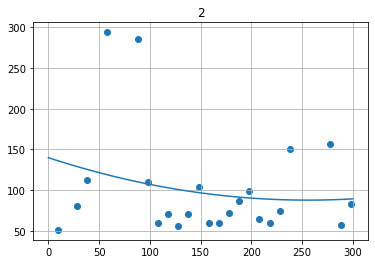

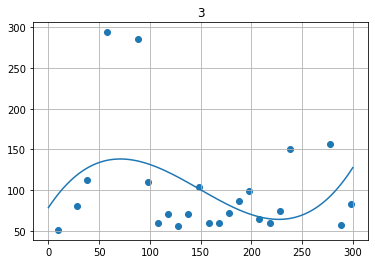

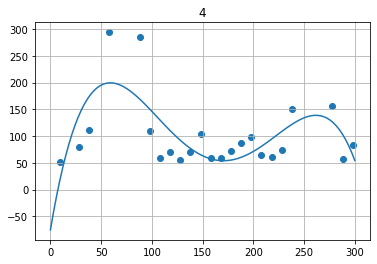

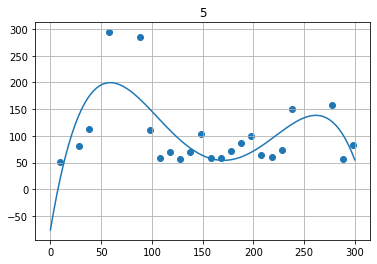

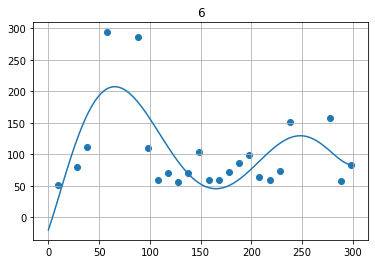

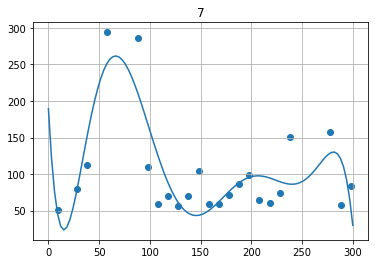

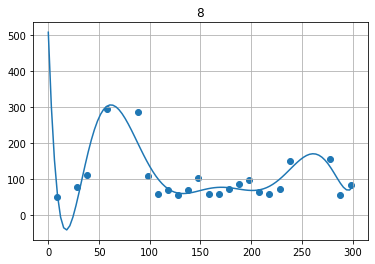

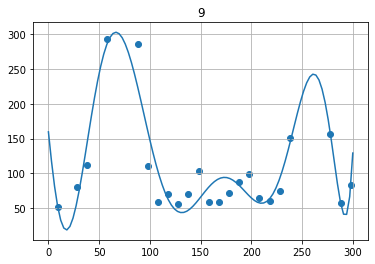

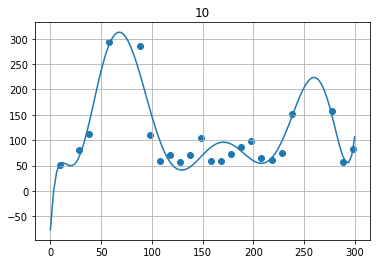

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  

for d in range(1, 11):
    popt, pcov = curve_fit(func, X, Y, p0=np.random.rand(d + 1)) 
    plt.scatter(X, Y)
    x_latent = np.linspace(0, 300, 100)
    fitted_curve = func(x_latent, *popt)
    plt.title(d)
    plt.plot(x_latent, fitted_curve)
    plt.grid()
    plt.show()

# 第87章：scipy.curve_fitによる線形回帰

In [22]:
data1 = [
 [3.41, 1.83], [1.58, 1.81], [3.35, 2.20], [1.92, 1.41], [1.72, 1.62],
 [3.44, 1.40], [3.52, 1.88], [1.65, 1.24], [2.82, 1.04], [1.87, 1.14],
 [2.78, 0.94], [2.52, 1.14], [2.64, 1.07], [1.51, 1.64], [1.43, 1.86],
 [3.09, 1.38], [2.49, 0.85], [3.21, 1.35], [2.17, 1.24], [2.91, 1.21]
]
target1 = [
 4.15, 0.50, 3.94, 1.56, 0.96,
 4.61, 4.34, 1.15, 3.55, 1.63,
 3.45, 2.93, 3.19, 0.52, 0.17,
 3.93, 2.82, 4.19, 2.19, 3.69
]

In [23]:
data2 = [
 [1.43, 2.49], [1.94, 2.50], [2.22, 2.22], [2.33, 2.11], [1.74, 2.30],
 [0.40, 1.53], [1.19, 2.34], [0.46, 1.52], [0.69, 2.17], [0.91, 2.35],
 [2.31, 2.21], [2.61, 1.66], [0.77, 2.10], [0.44, 1.65], [2.00, 2.35],
 [2.42, 1.57], [1.77, 2.50], [2.30, 1.84], [0.86, 2.16], [1.19, 2.47]
]
target2 = [
 8.47, 9.49, 9.46, 9.41, 8.06,
 5.45, 8.13, 5.52, 8.24, 8.71,
 9.75, 8.24, 7.90, 6.00, 9.12,
 7.52, 8.94, 8.23, 8.03, 8.65
]

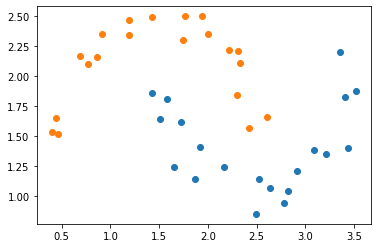

In [24]:
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

In [59]:
# ２変数用限定バージョン
def func2(X, a, b, c):
    Y = a + b * X[:, 0] + c * X[:, 1]
    return Y

In [27]:
from scipy.optimize import curve_fit  

d = 2
popt, pcov = curve_fit(func2, data1, target1, p0=np.random.rand(d + 1)) 
popt

array([-1.44736461,  2.01125544, -0.64445372])

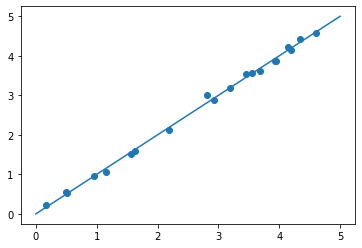

In [28]:
plt.scatter(target1, func2(np.array(data1), *popt))
plt.plot([0, 5], [0, 5])

In [60]:
# 汎用バージョン
import numpy as np
def func(X, *params):
    for i, param in enumerate(params):
        if i == 0:
            Y = X[:, 0].flatten()
        else:
            Y = Y + param * X[:, i - 1]
    return Y

In [61]:
from scipy.optimize import curve_fit  

d = 2
popt, pcov = curve_fit(func, data1, target1, p0=np.random.rand(d + 1)) 
popt

array([ 0.657094  ,  0.76419187, -1.19552475])

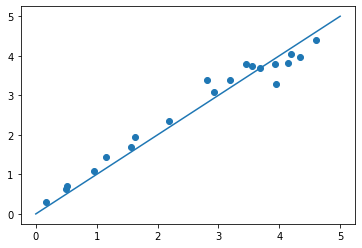

In [62]:
plt.scatter(target1, func(np.array(data1), *popt))
plt.plot([0, 5], [0, 5])

# 第88章：scipy.curve_fitによるロジスティック回帰

In [ ]:
y1 = [1 for x in data1]
y2 = [0 for x in data2]
X = np.array(data1 + data2)
Y = np.array(y1 + y2)

In [ ]:
def func2(X, a, b, c):
    Y = a + b * X[:, 0] + c * X[:, 1]
    return 1 / (1 + np.exp(-Y))

In [ ]:
from scipy.optimize import curve_fit  

d = 2
popt, pcov = curve_fit(func2, X, Y, p0=np.random.rand(d + 1)) 
popt

array([ 4.73846745,  1.3374921 , -4.08373662])

In [ ]:
x1 = np.linspace(0, 4, 2)
x2 = -(popt[0] + popt[1] * x1)/popt[2]

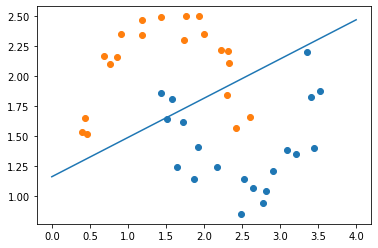

In [ ]:
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])
plt.plot(x1, x2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def heatmap(f, x_min=-12, x_max=12, y_min=-12, y_max=12, h=0.1, drawline=False, cmap=plt.cm.jet):
    x_mg, y_mg = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = [[f([x, y]) for x, y in zip(xx, yy)] for xx, yy in zip(x_mg,y_mg)]
    plt.axes().set_aspect('equal')
    #plt.contourf(x_mg, y_mg, Z, cmap=cmap)
    plt.imshow(Z, origin='lower', extent=[x_min, x_max, y_min, y_max], cmap=cmap)
    plt.colorbar()
    if drawline:
        plt.contour(x_mg, y_mg, Z, colors='black')
    plt.grid()
    #plt.show()

In [ ]:
predict = lambda x: 1 / (1 + np.exp(-(popt[0] + x[0] * popt[1] + x[1] * popt[2])))

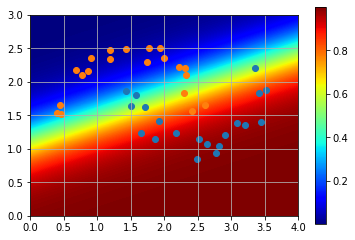

In [ ]:
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

# 第89章：scikit-learn による分類モデル

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X, Y)

LogisticRegression()

In [ ]:
model.predict(X)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [ ]:
model.predict_proba(X)[:, 1]

array([0.81045677, 0.36390027, 0.65533545, 0.65160332, 0.495023  ,
       0.91295504, 0.81394924, 0.66034623, 0.91515206, 0.75256313,
       0.92650715, 0.86307273, 0.89246546, 0.42665526, 0.30426586,
       0.88059157, 0.91605203, 0.89960392, 0.77692109, 0.89451255,
       0.1098367 , 0.17642911, 0.33974179, 0.4206294 , 0.20371176,
       0.21098362, 0.11302543, 0.22589184, 0.09285065, 0.08361618,
       0.36738292, 0.71044316, 0.11415018, 0.18017234, 0.23645909,
       0.7037648 , 0.15041899, 0.54697781, 0.11218224, 0.08937369])

In [ ]:
predict = lambda X: model.predict_proba([X])[:, 1][0]

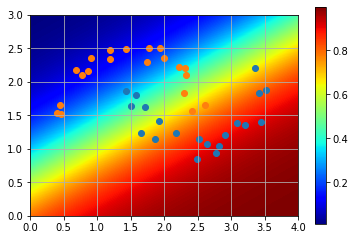

In [ ]:
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100), 
    max_iter=530000
)

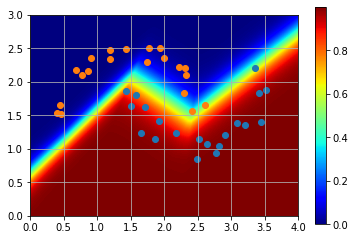

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(1000), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict_proba([X])[:, 1][0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

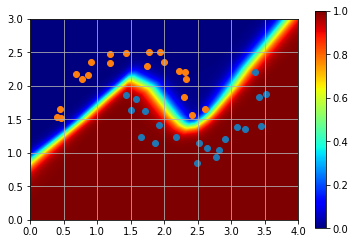

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(100, 100), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict_proba([X])[:, 1][0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

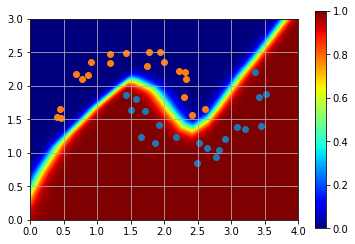

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(50, 50, 50), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict_proba([X])[:, 1][0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

# 第90章：scikit-learn による回帰モデル

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data1, target1)

LinearRegression()

In [ ]:
model.predict(data1)

array([4.23166614, 0.56395776, 3.87254294, 1.50556609, 0.96797973,
       4.5691189 , 4.42068156, 1.07208426, 3.55414387, 1.57900583,
       3.53813902, 2.88632186, 3.17278428, 0.53272701, 0.23004675,
       3.87806857, 3.01287578, 4.13875284, 2.11793709, 3.62559973])

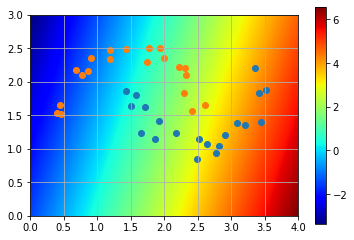

In [ ]:
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

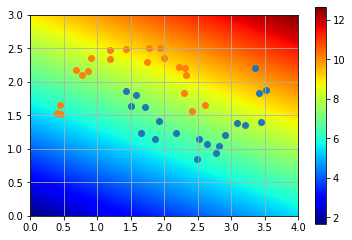

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data2, target2)
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

In [ ]:
X = data1 + data2
Y = target1 + target2

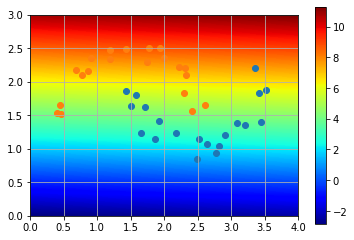

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(100, 100, 100), 
    max_iter=530000
)

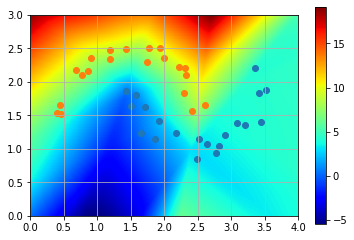

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(1000), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

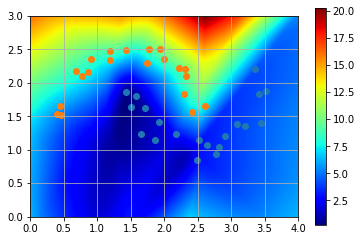

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(100, 100), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

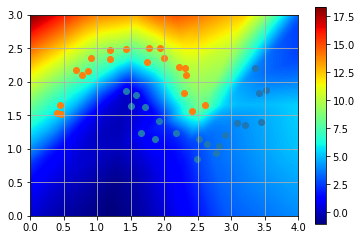

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=(50, 50, 50), 
    max_iter=530000
)
model.fit(X, Y)
predict = lambda X: model.predict([X])[0]
heatmap(predict, x_min=0, x_max=4, y_min=0, y_max=3, h=0.01)
plt.scatter([x[0] for x in data1], [x[1] for x in data1])
plt.scatter([x[0] for x in data2], [x[1] for x in data2])

# 第91章：表計算的ライブラリpandas

In [ ]:
# データフレーム操作に関するライブラリをインポートする
import pandas as pd

In [ ]:
df = pd.DataFrame([[100, -20, -60, -20, 100, 300, 580, 940, 1380, 1900],
 [92, -24, -60, -16, 108, 312, 596, 960, 1404, 1928],
 [84, -28, -60, -12, 116, 324, 612, 980, 1428, 1956],
 [77, -31, -59, -7, 125, 337, 629, 1001, 1453, 1985],
 [70, -34, -58, -2, 134, 350, 646, 1022, 1478, 2014],
 [62, -38, -58, 2, 142, 362, 662, 1042, 1502, 2042],
 [56, -40, -56, 8, 152, 376, 680, 1064, 1528, 2072],
 [49, -43, -55, 13, 161, 389, 697, 1085, 1553, 2101],
 [42, -46, -54, 18, 170, 402, 714, 1106, 1578, 2130],
 [36, -48, -52, 24, 180, 416, 732, 1128, 1604, 2160],
 [30, -50, -50, 30, 190, 430, 750, 1150, 1630, 2190],
 [24, -52, -48, 36, 200, 444, 768, 1172, 1656, 2220],
 [18, -54, -46, 42, 210, 458, 786, 1194, 1682, 2250],
 [13, -55, -43, 49, 221, 473, 805, 1217, 1709, 2281],
 [8, -56, -40, 56, 232, 488, 824, 1240, 1736, 2312],
 [2, -58, -38, 62, 242, 502, 842, 1262, 1762, 2342],
 [-2, -58, -34, 70, 254, 518, 862, 1286, 1790, 2374],
 [-7, -59, -31, 77, 265, 533, 881, 1309, 1817, 2405],
 [-12, -60, -28, 84, 276, 548, 900, 1332, 1844, 2436],
 [-16, -60, -24, 92, 288, 564, 920, 1356, 1872, 2468]],
                   index = list("abcdefghijklmnopqrst"),
                   columns = list("ABCDEFGHIJ"))

In [ ]:
df #データの中身を確認

,A,B,C,D,E,F,G,H,I,J
a,100,-20,-60,-20,100,300,580,940,1380,1900
b,92,-24,-60,-16,108,312,596,960,1404,1928
c,84,-28,-60,-12,116,324,612,980,1428,1956
d,77,-31,-59,-7,125,337,629,1001,1453,1985
e,70,-34,-58,-2,134,350,646,1022,1478,2014
f,62,-38,-58,2,142,362,662,1042,1502,2042
g,56,-40,-56,8,152,376,680,1064,1528,2072
h,49,-43,-55,13,161,389,697,1085,1553,2101
i,42,-46,-54,18,170,402,714,1106,1578,2130
j,36,-48,-52,24,180,416,732,1128,1604,2160


In [ ]:
df.head() #最初の数レコードだけ確認

,A,B,C,D,E,F,G,H,I,J
a,100,-20,-60,-20,100,300,580,940,1380,1900
b,92,-24,-60,-16,108,312,596,960,1404,1928
c,84,-28,-60,-12,116,324,612,980,1428,1956
d,77,-31,-59,-7,125,337,629,1001,1453,1985
e,70,-34,-58,-2,134,350,646,1022,1478,2014


In [ ]:
df.iloc[10:20, 5:9] # 指定した行、指定した列だけ抜き出す

,F,G,H,I
k,430,750,1150,1630
l,444,768,1172,1656
m,458,786,1194,1682
n,473,805,1217,1709
o,488,824,1240,1736
p,502,842,1262,1762
q,518,862,1286,1790
r,533,881,1309,1817
s,548,900,1332,1844
t,564,920,1356,1872


In [ ]:
import urllib.request
import pandas as pd

# ニューヨークの大気状態観測値データ
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/airquality.txt' 
urllib.request.urlretrieve(url, 'airquality.txt')

df = pd.read_csv('airquality.txt', sep='\t', index_col=0) 

In [ ]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
...,...,...,...,...,...,...
148,14,20,16.6,63,9,25
149,30,193,6.9,70,9,26
151,14,191,14.3,75,9,28
152,18,131,8.0,76,9,29


In [ ]:
df.mean()

Ozone       42.099099
Solar.R    184.801802
Wind         9.939640
Temp        77.792793
Month        7.216216
Day         15.945946
dtype: float64

In [ ]:
import urllib.request 

url = "https://github.com/maskot1977/ipython_notebook/blob/master/toydata/Teikoku-Shoin-Japan.xlsx?raw=true"
urllib.request.urlretrieve(url, 'Teikoku-Shoin-Japan.xlsx') 

('Teikoku-Shoin-Japan.xlsx', <http.client.HTTPMessage at 0x7fbd136ccdf0>)

In [ ]:
import pandas as pd
excel = pd.ExcelFile('Teikoku-Shoin-Japan.xlsx') 

In [ ]:
for s in enumerate(excel.sheet_names):
    print(s) # シートの名前と番号を列挙

(0, '面積\u3000〔2017年〕')
(1, '人口\u3000〔2018年〕')
(2, '人口密度\u3000〔2018年〕')
(3, '人口増加率\u3000〔2010～2015年〕')
(4, '老年（65歳以上）人口率\u3000〔2018年〕')
(5, '産業別人口割合(2015年)')
(6, '平均寿命（女）\u3000〔2015年〕')
(7, '平均寿命（男）\u3000〔2015年〕')
(8, '耕地面積〔2017年〕')
(9, '耕地率\u3000〔2017年〕')
(10, '森林率・人工林率〔2017年〕')
(11, '小麦の生産\u3000〔2018年〕')
(12, '米の生産\u3000〔2017年〕')
(13, 'さつまいもの生産\u3000〔2017年〕')
(14, 'じゃがいもの生産\u3000〔2017年〕')
(15, '大豆の生産\u3000〔2017年〕')
(16, '落花生の生産\u3000〔2017年〕')
(17, 'キャベツの生産\u3000〔2017年〕')
(18, 'きゅうりの生産\u3000〔2017年〕')
(19, 'すいかの生産\u3000〔2017年〕')
(20, 'だいこんの生産\u3000〔2017年〕')
(21, 'なたねの生産〔2017年〕')
(22, 'にんじんの生産\u3000〔2017年〕')
(23, 'ねぎの生産\u3000〔2017年〕')
(24, 'はくさいの生産\u3000〔2017年〕')
(25, 'ピーマンの生産\u3000〔2017年〕')
(26, 'ほうれん草の生産\u3000〔2017年〕')
(27, '茶（荒茶）の生産\u3000〔2017年〕')
(28, 'いちごの生産\u3000〔2017年〕')
(29, 'うめの生産\u3000〔2017年〕')
(30, 'メロンの生産\u3000〔2017年〕')
(31, '柿の生産\u3000〔2017年〕')
(32, 'さくらんぼの生産\u3000〔2017年〕')
(33, 'みかんの生産\u3000〔2017年〕')
(34, 'ももの生産\u3000〔2017年〕')
(35, 'りんごの生産\u3000〔2017年〕')
(36, '菊の出荷量 〔2017年〕

In [ ]:
sheet_index = 2
print(excel.sheet_names[sheet_index])
sheet = excel.parse(excel.sheet_names[sheet_index], header=None) # 2枚目のシートの中身を pandas 形式にする

人口密度　〔2018年〕


In [ ]:
sheet

,0,1,2
0,出典：平成30年住民基本台帳人口・世帯数表、平成29年全国都道府県市区町村別面積調,NaN,NaN
1,県コード,県名,(人/km2）
2,1,北海道,64
3,2,青森,136
4,3,岩手,83
5,4,宮城,317
6,5,秋田,87
7,6,山形,119
8,7,福島,139
9,8,茨城,484


In [ ]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
...,...,...,...,...,...,...
148,14,20,16.6,63,9,25
149,30,193,6.9,70,9,26
151,14,191,14.3,75,9,28
152,18,131,8.0,76,9,29


In [ ]:
data_np = df.values
data_np

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  62. ,   5. ,  20. ],
       [  1. ,   8. ,   9.7,  59. ,   5. ,  21. ],
       [ 11. , 320. ,  16.6,  73. ,   5. ,  22. ],
       [  4. ,  25. ,   9.7,  61. ,   5. ,  23. ],
       [ 32. ,  92. ,  12. ,  6

In [ ]:
data_list = df.values.tolist()
data_list

[[41.0, 190.0, 7.4, 67.0, 5.0, 1.0],
 [36.0, 118.0, 8.0, 72.0, 5.0, 2.0],
 [12.0, 149.0, 12.6, 74.0, 5.0, 3.0],
 [18.0, 313.0, 11.5, 62.0, 5.0, 4.0],
 [23.0, 299.0, 8.6, 65.0, 5.0, 7.0],
 [19.0, 99.0, 13.8, 59.0, 5.0, 8.0],
 [8.0, 19.0, 20.1, 61.0, 5.0, 9.0],
 [16.0, 256.0, 9.7, 69.0, 5.0, 12.0],
 [11.0, 290.0, 9.2, 66.0, 5.0, 13.0],
 [14.0, 274.0, 10.9, 68.0, 5.0, 14.0],
 [18.0, 65.0, 13.2, 58.0, 5.0, 15.0],
 [14.0, 334.0, 11.5, 64.0, 5.0, 16.0],
 [34.0, 307.0, 12.0, 66.0, 5.0, 17.0],
 [6.0, 78.0, 18.4, 57.0, 5.0, 18.0],
 [30.0, 322.0, 11.5, 68.0, 5.0, 19.0],
 [11.0, 44.0, 9.7, 62.0, 5.0, 20.0],
 [1.0, 8.0, 9.7, 59.0, 5.0, 21.0],
 [11.0, 320.0, 16.6, 73.0, 5.0, 22.0],
 [4.0, 25.0, 9.7, 61.0, 5.0, 23.0],
 [32.0, 92.0, 12.0, 61.0, 5.0, 24.0],
 [23.0, 13.0, 12.0, 67.0, 5.0, 28.0],
 [45.0, 252.0, 14.9, 81.0, 5.0, 29.0],
 [115.0, 223.0, 5.7, 79.0, 5.0, 30.0],
 [37.0, 279.0, 7.4, 76.0, 5.0, 31.0],
 [29.0, 127.0, 9.7, 82.0, 6.0, 7.0],
 [71.0, 291.0, 13.8, 90.0, 6.0, 9.0],
 [39.0, 323.0, 11.5

In [ ]:
data_np = np.array(data_list)
data_np

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  62. ,   5. ,  20. ],
       [  1. ,   8. ,   9.7,  59. ,   5. ,  21. ],
       [ 11. , 320. ,  16.6,  73. ,   5. ,  22. ],
       [  4. ,  25. ,   9.7,  61. ,   5. ,  23. ],
       [ 32. ,  92. ,  12. ,  6

In [ ]:
data_pd = pd.DataFrame(data_list)
data_pd

,0,1,2,3,4,5
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,23.0,299.0,8.6,65.0,5.0,7.0
...,...,...,...,...,...,...
106,14.0,20.0,16.6,63.0,9.0,25.0
107,30.0,193.0,6.9,70.0,9.0,26.0
108,14.0,191.0,14.3,75.0,9.0,28.0
109,18.0,131.0,8.0,76.0,9.0,29.0


In [ ]:
data_list = data_np.tolist()
data_list

[[41.0, 190.0, 7.4, 67.0, 5.0, 1.0],
 [36.0, 118.0, 8.0, 72.0, 5.0, 2.0],
 [12.0, 149.0, 12.6, 74.0, 5.0, 3.0],
 [18.0, 313.0, 11.5, 62.0, 5.0, 4.0],
 [23.0, 299.0, 8.6, 65.0, 5.0, 7.0],
 [19.0, 99.0, 13.8, 59.0, 5.0, 8.0],
 [8.0, 19.0, 20.1, 61.0, 5.0, 9.0],
 [16.0, 256.0, 9.7, 69.0, 5.0, 12.0],
 [11.0, 290.0, 9.2, 66.0, 5.0, 13.0],
 [14.0, 274.0, 10.9, 68.0, 5.0, 14.0],
 [18.0, 65.0, 13.2, 58.0, 5.0, 15.0],
 [14.0, 334.0, 11.5, 64.0, 5.0, 16.0],
 [34.0, 307.0, 12.0, 66.0, 5.0, 17.0],
 [6.0, 78.0, 18.4, 57.0, 5.0, 18.0],
 [30.0, 322.0, 11.5, 68.0, 5.0, 19.0],
 [11.0, 44.0, 9.7, 62.0, 5.0, 20.0],
 [1.0, 8.0, 9.7, 59.0, 5.0, 21.0],
 [11.0, 320.0, 16.6, 73.0, 5.0, 22.0],
 [4.0, 25.0, 9.7, 61.0, 5.0, 23.0],
 [32.0, 92.0, 12.0, 61.0, 5.0, 24.0],
 [23.0, 13.0, 12.0, 67.0, 5.0, 28.0],
 [45.0, 252.0, 14.9, 81.0, 5.0, 29.0],
 [115.0, 223.0, 5.7, 79.0, 5.0, 30.0],
 [37.0, 279.0, 7.4, 76.0, 5.0, 31.0],
 [29.0, 127.0, 9.7, 82.0, 6.0, 7.0],
 [71.0, 291.0, 13.8, 90.0, 6.0, 9.0],
 [39.0, 323.0, 11.5

In [ ]:
data_pd = pd.DataFrame(data_np)
data_pd

,0,1,2,3,4,5
0,41.0,190.0,7.4,67.0,5.0,1.0
1,36.0,118.0,8.0,72.0,5.0,2.0
2,12.0,149.0,12.6,74.0,5.0,3.0
3,18.0,313.0,11.5,62.0,5.0,4.0
4,23.0,299.0,8.6,65.0,5.0,7.0
...,...,...,...,...,...,...
106,14.0,20.0,16.6,63.0,9.0,25.0
107,30.0,193.0,6.9,70.0,9.0,26.0
108,14.0,191.0,14.3,75.0,9.0,28.0
109,18.0,131.0,8.0,76.0,9.0,29.0


# 第92章：pandasによるグラフ描画

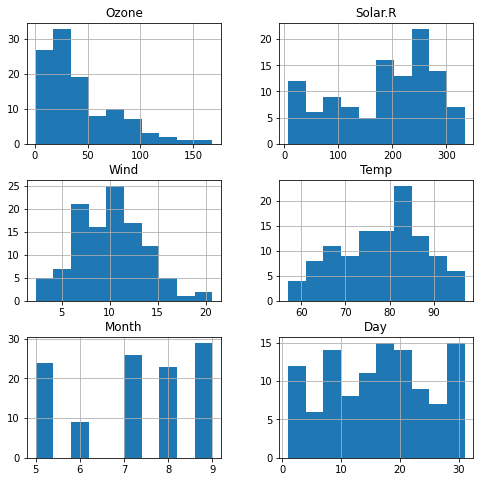

In [ ]:
# ヒストグラム
df.hist(figsize=(8,8))
plt.show()

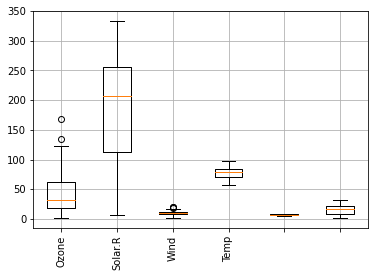

In [ ]:
# ボックスプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df.values.T.tolist())
ax.set_xticklabels(df.columns[0:4], rotation=90)
plt.grid()
plt.show()

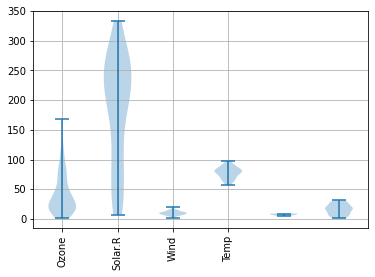

In [ ]:
# バイオリンプロット
fig = plt.figure()
ax = fig.add_subplot(111)
ax.violinplot(df.values.T.tolist())
ax.set_xticks([1, 2, 3, 4]) #データ範囲のどこに目盛りが入るかを指定する
ax.set_xticklabels(df.columns[0:4], rotation=90)
plt.grid()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd1211bfa0>,
      dtype=object)

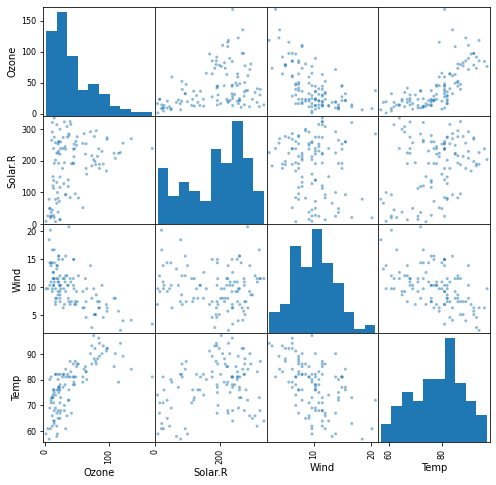

In [ ]:
from pandas import plotting 
plotting.scatter_matrix(df[df.columns[0:4]], figsize=(8, 8)) 

In [ ]:
df.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.348342,-0.612497,0.698541,0.142885,-0.005190
Solar.R,0.348342,1.000000,-0.127183,0.294088,-0.074067,-0.057754
Wind,-0.612497,-0.127183,1.000000,-0.497190,-0.194496,0.049871
Temp,0.698541,0.294088,-0.497190,1.000000,0.403972,-0.096546
Month,0.142885,-0.074067,-0.194496,0.403972,1.000000,-0.009001
Day,-0.005190,-0.057754,0.049871,-0.096546,-0.009001,1.000000


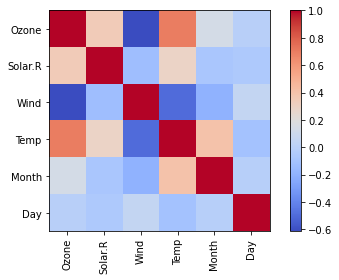

In [ ]:
import numpy as np
corrcoef = df.corr()
plt.imshow(corrcoef, interpolation='nearest', cmap=plt.cm.coolwarm)
plt.colorbar()
tick_marks = np.arange(len(corrcoef))
plt.xticks(tick_marks, corrcoef.index, rotation=90)
plt.yticks(tick_marks, corrcoef.index)
plt.tight_layout()

In [ ]:
sheets = []
for sheet_index in [2, 77, 78, 83]:
    print(excel.sheet_names[sheet_index])
    sheet = excel.parse(excel.sheet_names[sheet_index], header=None) # 2枚目のシートの中身を pandas 形式にする
    sheets.append(sheet)

人口密度　〔2018年〕
1人あたりの都市公園面積　〔2017年3月末〕
1人あたりの電力需要量　〔2015年〕
公害苦情件数　〔2017年〕


In [ ]:
sheet0 = sheets[0].iloc[2:49, 1:]
sheet0.columns = ['都道府県', "人口密度"]
sheet0.reset_index()
sheet0

,都道府県,人口密度
2,北海道,64
3,青森,136
4,岩手,83
5,宮城,317
6,秋田,87
7,山形,119
8,福島,139
9,茨城,484
10,栃木,310
11,群馬,313


In [ ]:
sheet1 = sheets[1].iloc[2:49, 1:]
sheet1.columns = ['都道府県', "都市公園面積"]
sheet1.reset_index()
sheet1

,都道府県,都市公園面積
2,北海道,38.8
3,青森,18
4,岩手,14.7
5,宮城,23.5
6,秋田,21.6
7,山形,20.1
8,福島,13.1
9,茨城,9.6
10,栃木,14.4
11,群馬,14.2


In [ ]:
sheet2 = sheets[2].iloc[3:50, 1:]
sheet2.columns = ['都道府県', "電力需要"]
sheet2.reset_index()
sheet2

,都道府県,電力需要
3,北海道,2521
4,青森,2378
5,岩手,2521
6,宮城,2385
7,秋田,2487
8,山形,2528
9,福島,2382
10,茨城,2363
11,栃木,2461
12,群馬,2455


In [ ]:
sheet3 = sheets[3].iloc[2:49, 1:]
sheet3.columns = ['都道府県', "公害苦情件数"]
sheet3.reset_index()
sheet3

,都道府県,公害苦情件数
2,北海道,1454
3,青森県,431
4,岩手県,522
5,宮城県,586
6,秋田県,355
7,山形県,702
8,福島県,582
9,茨城県,3652
10,栃木県,1458
11,群馬県,1277


In [ ]:
concatenated = pd.concat([sheet0, sheet1, sheet2, sheet3], axis=1)
concatenated

,都道府県,人口密度,都道府県,都市公園面積,都道府県,電力需要,都道府県,公害苦情件数
2,北海道,64,北海道,38.8,NaN,NaN,北海道,1454
3,青森,136,青森,18,北海道,2521,青森県,431
4,岩手,83,岩手,14.7,青森,2378,岩手県,522
5,宮城,317,宮城,23.5,岩手,2521,宮城県,586
6,秋田,87,秋田,21.6,宮城,2385,秋田県,355
7,山形,119,山形,20.1,秋田,2487,山形県,702
8,福島,139,福島,13.1,山形,2528,福島県,582
9,茨城,484,茨城,9.6,福島,2382,茨城県,3652
10,栃木,310,栃木,14.4,茨城,2363,栃木県,1458
11,群馬,313,群馬,14.2,栃木,2461,群馬県,1277
